In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                             roc_auc_score, roc_curve, confusion_matrix)

%matplotlib inline

In [2]:
df = pd.read_csv('EDA-N.csv', index_col=0)
df

,outcome,days_in_shelter,age_in_days,name_yes,type_DOG,type_OTHER,breed_pure,color_single,gonadectomy_yes,size_MED,...,size_X-LRG,size_X_SMALL,intake_type_STRAY,outcome_condition_positive,outcome_day_of_week_1,outcome_day_of_week_2,outcome_day_of_week_3,outcome_day_of_week_4,outcome_day_of_week_5,outcome_day_of_week_6
0,1,6,101,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,20,1116,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,18,129,1,0,0,1,0,1,0,...,0,1,1,1,0,1,0,0,0,0
3,1,18,129,1,0,0,1,1,1,0,...,0,1,1,1,0,1,0,0,0,0
4,1,1,398,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15276,1,29,2192,1,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
15277,1,42,73,1,0,0,1,0,1,0,...,0,1,1,1,0,1,0,0,0,0
15278,0,13,378,0,1,0,0,1,0,0,...,0,1,1,1,0,0,0,1,0,0
15279,1,16,715,1,1,0,0,1,1,0,...,0,1,1,1,0,0,0,0,1,0


In [3]:
X = df.drop(['outcome'], axis=1)
y = df.outcome

In [4]:
X

,days_in_shelter,age_in_days,name_yes,type_DOG,type_OTHER,breed_pure,color_single,gonadectomy_yes,size_MED,size_SMALL,size_X-LRG,size_X_SMALL,intake_type_STRAY,outcome_condition_positive,outcome_day_of_week_1,outcome_day_of_week_2,outcome_day_of_week_3,outcome_day_of_week_4,outcome_day_of_week_5,outcome_day_of_week_6
0,6,101,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,20,1116,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0
2,18,129,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0
3,18,129,1,0,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0
4,1,398,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15276,29,2192,1,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0
15277,42,73,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0
15278,13,378,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0
15279,16,715,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,1,0


In [5]:
y

0        1
1        1
2        1
3        1
4        1
        ..
15276    1
15277    1
15278    0
15279    1
15280    0
Name: outcome, Length: 15281, dtype: int64

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                        test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                        test_size=0.25, random_state=42)

## KNN 

In [7]:
std = StandardScaler()
X_train_s = std.fit_transform(X_train)
X_val_s = std.transform(X_val)

knn = KNeighborsClassifier()
knn.fit(X_train_s, y_train)

knn_pred = knn.predict(X_val_s)
knn_accuracy = knn.score(X_val_s, y_val)
knn_precision = precision_score(y_val, knn_pred)
knn_recall = recall_score(y_val, knn_pred)
knn_f1 = f1_score(y_val, knn_pred)

knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_val, knn.predict_proba(X_val_s)[:,1])
knn_auc = roc_auc_score(y_val, knn.predict_proba(X_val_s)[:,1])

print('KNN metrics:' + '\n' 
      f'  Accuracy:{knn_accuracy: .3f}' + '\n'
      f'  Precision:{knn_precision: .3f}' + '\n'
      f'  Recall:{knn_recall: .3f}' + '\n'
      f'  F1:{knn_f1: .3f}' + '\n'
      f'  ROC AUC: {knn_auc: .3f}')

KNN metrics:
  Accuracy: 0.847
  Precision: 0.867
  Recall: 0.944
  F1: 0.904
  ROC AUC:  0.839


## Logistic Regression 

In [8]:
std = StandardScaler()
X_train_s = std.fit_transform(X_train)
X_val_s = std.transform(X_val)

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_s, y_train)

lr_pred = lr.predict(X_val_s)
lr_accuracy = lr.score(X_val_s, y_val)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred)

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_val, lr.predict_proba(X_val_s)[:,1])
lr_auc = roc_auc_score(y_val, lr.predict_proba(X_val_s)[:,1])

print('Logistic regression metrics:' + '\n' 
      f'  Accuracy:{lr_accuracy: .3f}' + '\n'
      f'  Precision:{lr_precision: .3f}' + '\n'
      f'  Recall:{lr_recall: .3f}' + '\n'
      f'  F1:{lr_f1: .3f}' + '\n'
      f'  ROC AUC: {lr_auc: .3f}')

Logistic regression metrics:
  Accuracy: 0.855
  Precision: 0.872
  Recall: 0.949
  F1: 0.909
  ROC AUC:  0.870


## Decision Tree 

In [9]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_val)
dt_accuracy = dt.score(X_val, y_val)
dt_precision = precision_score(y_val, dt_pred)
dt_recall = recall_score(y_val, dt_pred)
dt_f1 = f1_score(y_val, dt_pred)

dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_val, dt.predict_proba(X_val)[:,1])
dt_auc = roc_auc_score(y_val, dt.predict_proba(X_val)[:,1])

print('Decision Tree metrics:' + '\n' 
      f'  Accuracy:{dt_accuracy: .3f}' + '\n'
      f'  Precision:{dt_precision: .3f}' + '\n'
      f'  Recall:{dt_recall: .3f}' + '\n'
      f'  F1:{dt_f1: .3f}' + '\n'
      f'  ROC AUC: {dt_auc: .3f}')

Decision Tree metrics:
  Accuracy: 0.836
  Precision: 0.895
  Recall: 0.890
  F1: 0.892
  ROC AUC:  0.777


## Random Forest

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_val)
rf_accuracy = rf.score(X_val, y_val)
rf_precision = precision_score(y_val, rf_pred)
rf_recall = recall_score(y_val, rf_pred)
rf_f1 = f1_score(y_val, rf_pred)

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_val, rf.predict_proba(X_val)[:,1])
rf_auc = roc_auc_score(y_val, rf.predict_proba(X_val)[:,1])

print('Random Forest metrics:' + '\n' 
      f'  Accuracy:{rf_accuracy: .3f}' + '\n'
      f'  Precision:{rf_precision: .3f}' + '\n'
      f'  Recall:{rf_recall: .3f}' + '\n'
      f'  F1:{rf_f1: .3f}' + '\n'
      f'  ROC AUC: {rf_auc: .3f}')

Random Forest metrics:
  Accuracy: 0.876
  Precision: 0.894
  Recall: 0.950
  F1: 0.921
  ROC AUC:  0.916


# ROC Curves 

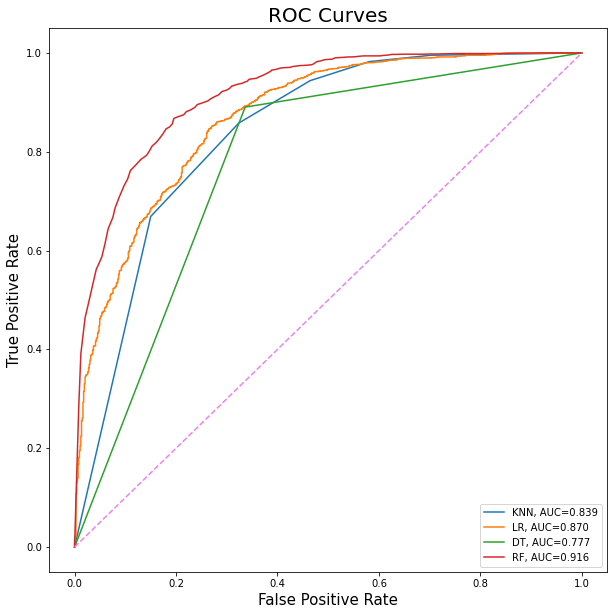

In [11]:
plt.figure(figsize=[10,10])
plt.plot(knn_fpr, knn_tpr, label = 'KNN, AUC=%.3f' %knn_auc)
plt.plot(lr_fpr, lr_tpr, label = 'LR, AUC=%.3f' %lr_auc)
plt.plot(dt_fpr, dt_tpr, label = 'DT, AUC=%.3f' %dt_auc)
plt.plot(rf_fpr, rf_tpr, label = 'RF, AUC=%.3f' %rf_auc)

plt.plot([0,1], [0,1], c='violet', ls='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curves', fontsize=20)
plt.legend(loc='lower right', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('Baseline ROC Curves - Models')

Random forest has the best ROC AUC. Let's start its hyperparameter tuning.

# Tuning Model Hyperparameters

In [12]:
rf = RandomForestClassifier()

In [13]:
n_estimators = [10000]
criterion = ['gini', 'entropy']

param_grid = dict(criterion=criterion, n_estimators=n_estimators)

grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10000]},
             scoring='f1')

In [22]:
print('Best params: ', grid_rf.best_params_)
print('Best estimator: ', grid_rf.best_estimator_)
print('Best score: ', grid_rf.best_score_)

Best params:  {'criterion': 'entropy', 'n_estimators': 10000}
Best estimator:  RandomForestClassifier(criterion='entropy', n_estimators=10000)
Best score:  0.9234776234736151


In [14]:
# Validation scores with best param
rf = RandomForestClassifier(criterion='entropy', n_estimators=10000)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_val)
rf_accuracy = rf.score(X_val, y_val)
rf_precision = precision_score(y_val, rf_pred)
rf_recall = recall_score(y_val, rf_pred)
rf_f1 = f1_score(y_val, rf_pred)

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_val, rf.predict_proba(X_val)[:,1])
rf_auc = roc_auc_score(y_val, rf.predict_proba(X_val)[:,1])

print('Random Forest metrics (validation w/ best param):' + '\n' 
      f'  Accuracy:{rf_accuracy: .3f}' + '\n'
      f'  Precision:{rf_precision: .3f}' + '\n'
      f'  Recall:{rf_recall: .3f}' + '\n'
      f'  F1:{rf_f1: .3f}' + '\n'
      f'  ROC AUC: {rf_auc: .3f}')

Random Forest metrics (validation w/ best param):
  Accuracy: 0.879
  Precision: 0.894
  Recall: 0.953
  F1: 0.923
  ROC AUC:  0.920


# Test Group Performance with Tuned Hyperparameters

In [15]:
# Test scores with best param
rf = RandomForestClassifier(criterion='entropy', n_estimators=10000)
rf.fit(X_train_val, y_train_val)

rf_pred = rf.predict(X_test)
rf_accuracy = rf.score(X_test, y_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

print('Random Forest metrics (test with best param):' + '\n' 
      f'  Accuracy:{rf_accuracy: .3f}' + '\n'
      f'  Precision:{rf_precision: .3f}' + '\n'
      f'  Recall:{rf_recall: .3f}' + '\n'
      f'  F1:{rf_f1: .3f}' + '\n'
      f'  ROC AUC: {rf_auc: .3f}')

Random Forest metrics (test with best param):
  Accuracy: 0.880
  Precision: 0.899
  Recall: 0.945
  F1: 0.922
  ROC AUC:  0.930


In [16]:
def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    outcome_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(outcome_confusion, cmap=plt.cm.Blues, annot=True, 
                square=True, fmt='d',
           xticklabels=['no home', 'home'],
           yticklabels=['no home', 'home']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

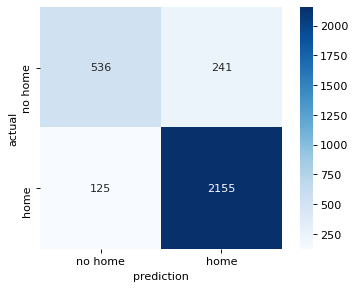

In [17]:
make_confusion_matrix(rf)

# Feature Importance

In [18]:
import shap

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.2, random_state=42)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


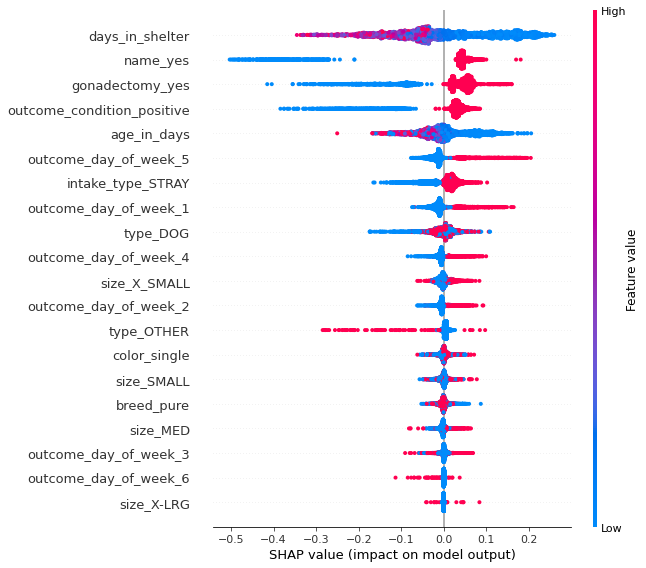

In [20]:
rforest = RandomForestClassifier(criterion='entropy', n_estimators=10000)
rforest.fit(X_train, y_train)


# Get the feature importance in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X_test, check_additivity=False)
shap.summary_plot(shap_values[1], X_test)